In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
from collections import defaultdict
import pandas as pd
import seaborn as sns

In [53]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [54]:
log_file_list = ["..\\logs\\demand_pinning_sweep_topo\\2022_6_20_10_49_38_511\\random_regular_graphs_DemandPinning.txt",
                 "..\\logs\\demand_pinning_sweep_topo\\2022_6_20_1_57_41_870\\random_regular_graphs_DemandPinning.txt"]
num_nodes_to_radix_to_gap = defaultdict(dict)

In [55]:
data_pd_dictionary = {"seed": [], "thresh": [], "gap": [], "radix": [], "nodes": []}
link_cap = 5000
for log_file in log_file_list:
    with open(log_file, "r") as fp:
        for fline in fp.readlines():
            if fline.startswith("#"):
                continue
            seed, numNodes, radix, numPaths, thresh, opt, heuristic, gap = fline.split(",")
            gap = float(gap)
            thresh = float(thresh)
            seed = int(seed)
            numNodes = int(numNodes)
            radix = int(radix)
            numPaths = int(numPaths)
            norm_gap = gap * 100 / (radix * numNodes * link_cap)
            data_pd_dictionary["seed"].append(seed)
            data_pd_dictionary["gap"].append(norm_gap)
            data_pd_dictionary["thresh"].append(thresh)
            data_pd_dictionary["radix"].append(radix)
            data_pd_dictionary["nodes"].append(numNodes)

In [56]:
data_df = pd.DataFrame(data_pd_dictionary)
data_df

,seed,thresh,gap,radix,nodes
0,1,250.0,11.250000,3,8
1,1,250.0,3.500000,5,8
2,1,250.0,1.696429,7,8
3,1,250.0,15.000000,3,10
4,1,250.0,6.200000,5,10
5,1,250.0,3.000000,7,10
6,1,250.0,28.194444,3,12
7,0,250.0,12.500000,3,8
8,0,250.0,3.000000,5,8
9,0,250.0,1.517857,7,8


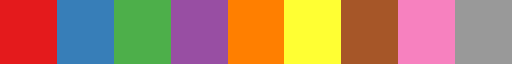

In [57]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [58]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
# colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(4)]
line_styles = ["--", "--", ":", "--"]

inf


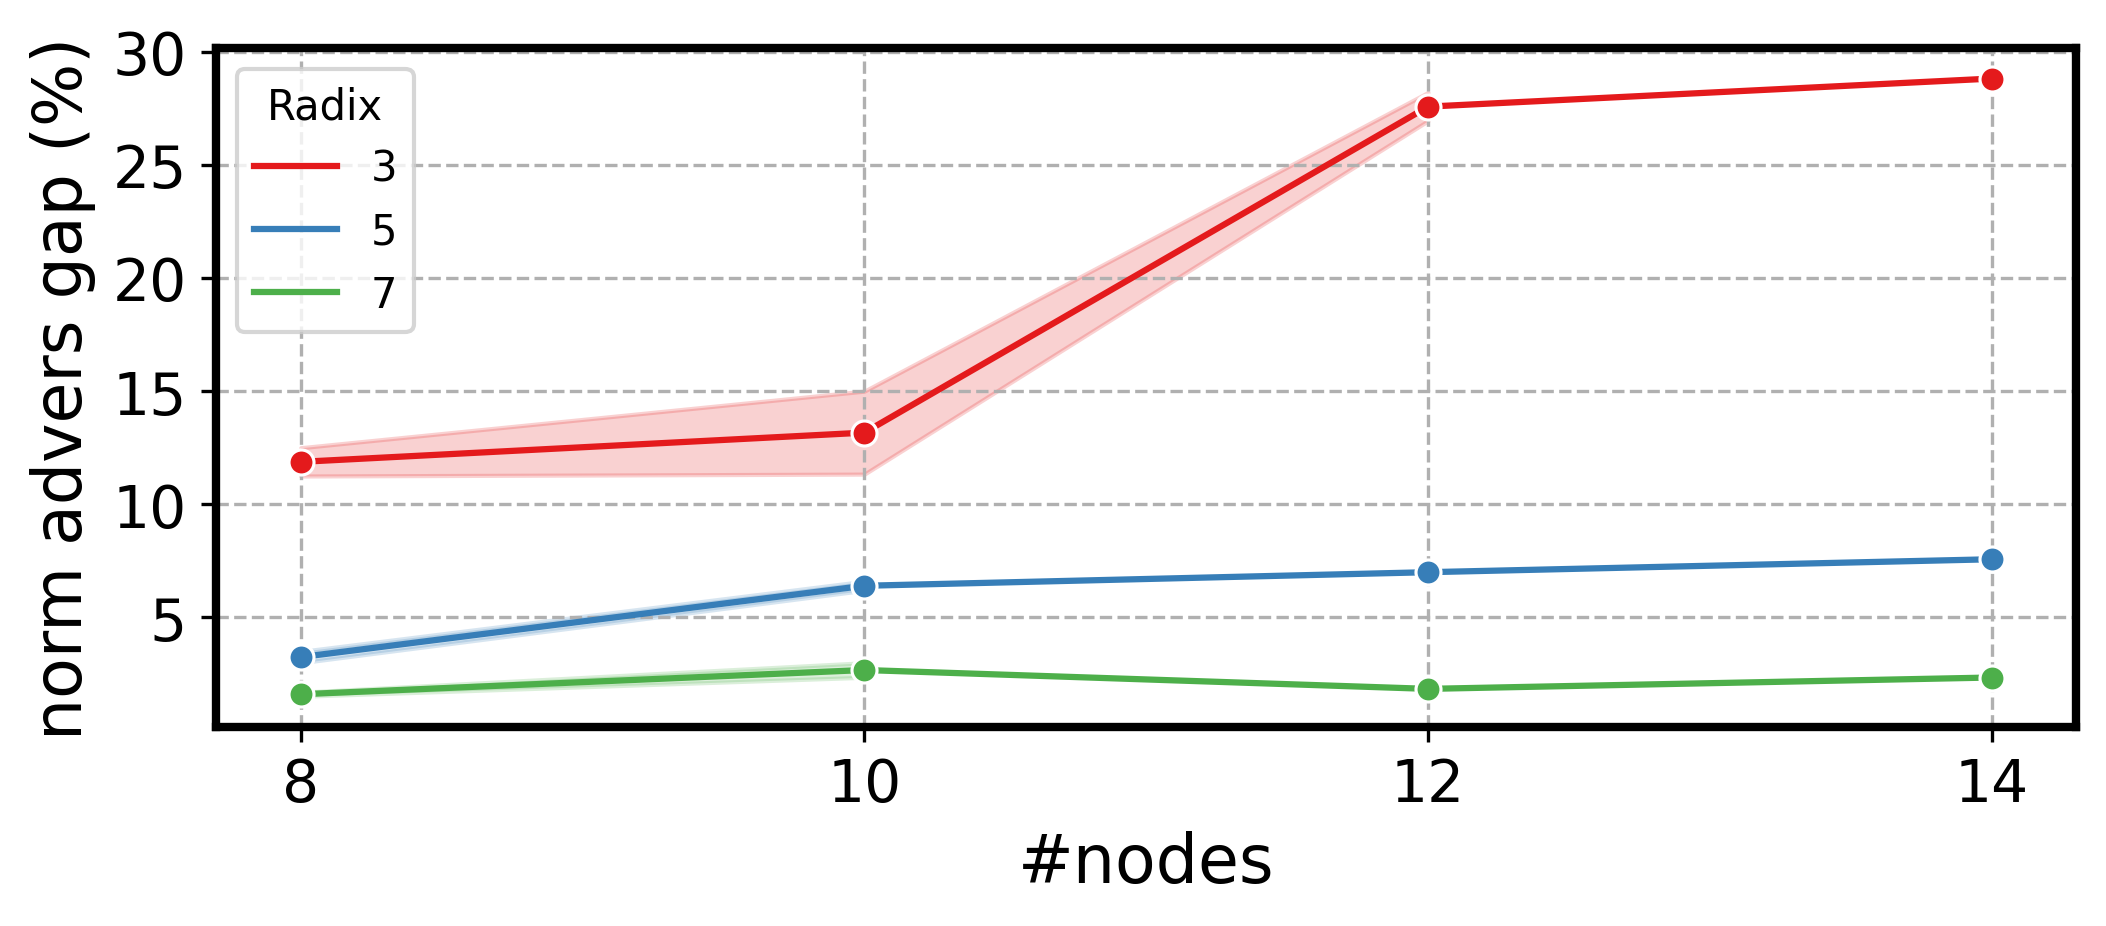

In [60]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
x_min = np.Inf
sns.lineplot(x="nodes", y="gap",
             hue="radix", data=data_df, 
             palette="Set1",
             marker="o", 
            #  mfc="white"
             )

plt.legend(fontsize=12, loc="upper left")
# plt.title("Pop2 + 2-shortest paths on B4", fontsize=16)
plt.xlabel("#nodes", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
# plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([8, 10, 12, 14], fontsize=14)
# plt.xlim([0.009, 1100])
# plt.ylim([0, 46])
plt.grid(which="major", zorder=-1, linestyle="--")
plt.legend(title="Radix", title_fontsize = "10")
plt.savefig(output_fig_dir + "demand_pinning_sweep_topo.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "demand_pinning_sweep_topo.pdf", bbox_inches="tight", format="pdf", dpi=300)
print(x_min)